In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps
import pickle
from magpie_data import NeLMap2, FaradayMap2, PolarimetryMap2, InterferogramOntoAlpha

In [4]:
%cd "~\Google Drive\MAGPIE\data\2016\s0921_16 Faraday"

C:\Users\jdhare\Google Drive\MAGPIE\data\2016\s0921_16 Faraday


In [5]:
R0fn='s0921_16_111618_c1.png'
R1fn='s0921_16_111543_c2.png'
B0fn='s0921_16_114420_c1.png'
B1fn='s0921_16_114345_c2.png'
S0fn='s0921_16_123034_c1.png'
S1fn='s0921_16_122959_c2.png'
s=PolarimetryMap2(R0fn, R1fn, B0fn, B1fn, S0fn, S1fn, rot_angle=-1)

<IPython.core.display.Javascript object>


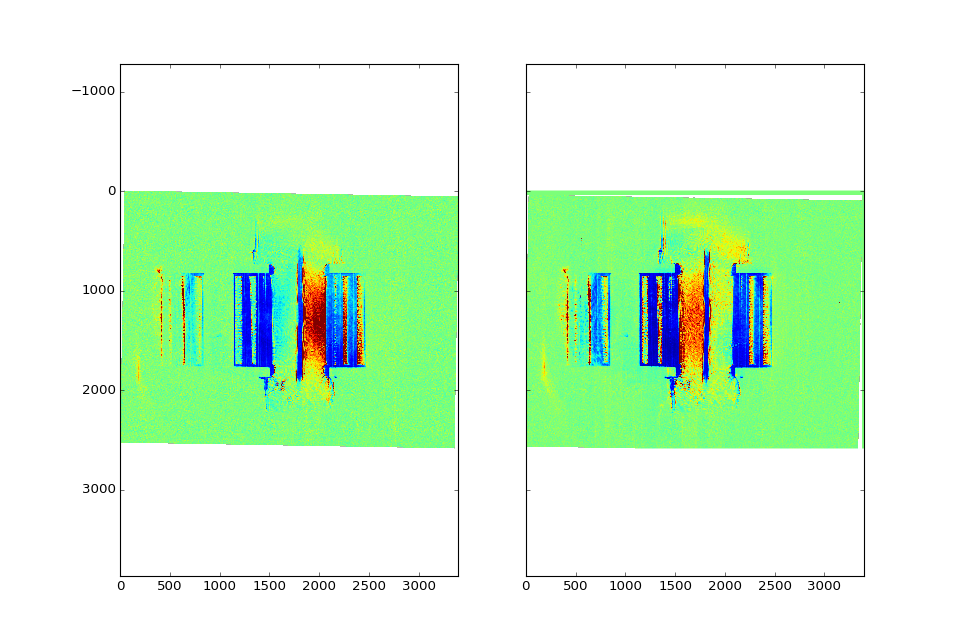

In [10]:
fig, ax=plt.subplots(1,2,sharex=True, sharey=True,figsize=(12,8))
ax[0].imshow(s.N0, clim=[0,2])
ax[1].imshow(s.N1, clim=[0,2])

In [6]:
constraints={'angle':(0,0.1),'scale':(1,0.1),'tx':(20,100),'ty':(50,100)}
t=pickle.load( open( "s0921_16 faraday registration.p", "rb" ) )

In [7]:
s.register(constraints=constraints, transform=t)
s.convert_to_alpha()

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:144: RuntimeWarning: invalid value encountered in true_divide
  self.N0=self.S0/self.B0
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:145: RuntimeWarning: invalid value encountered in true_divide
  self.N1=self.ST/self.BT
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:149: RuntimeWarning: invalid value encountered in arcsin
  self.data=-(180/np.pi)*0.5*np.arcsin(self.diff*np.tan(beta)/2.0)


In [12]:
s.pickle_transform(fn=s.fn[:8]+' faraday registration.p')

<IPython.core.display.Javascript object>


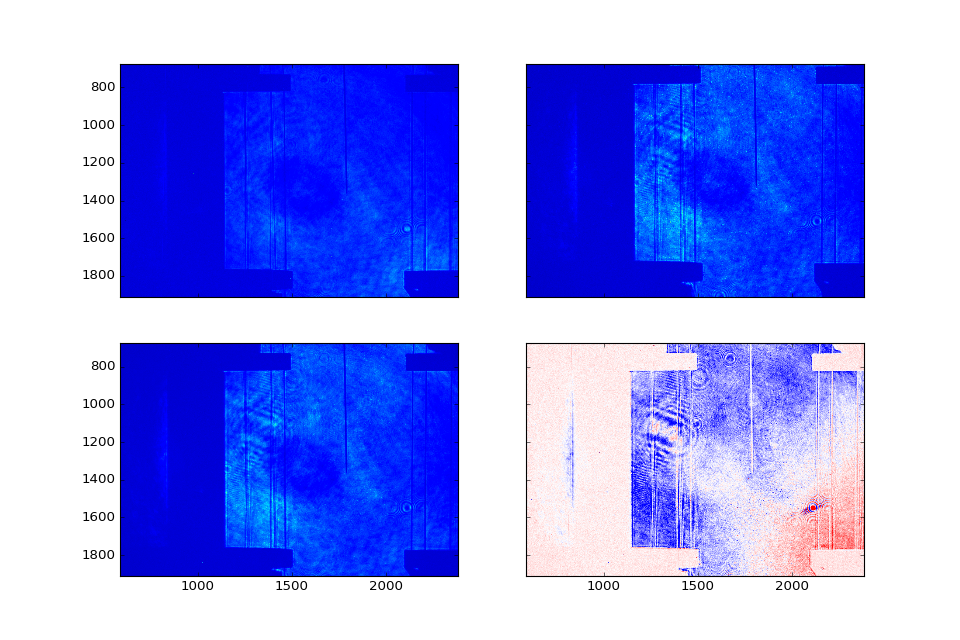

In [10]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(s.R1, clim=[0,0.1])
ax[1,0].imshow(s.RT, clim=[0,0.1])
ax[1,1].imshow(s.R0-s.RT, clim=[-0.01,0.01], cmap='bwr')

<IPython.core.display.Javascript object>


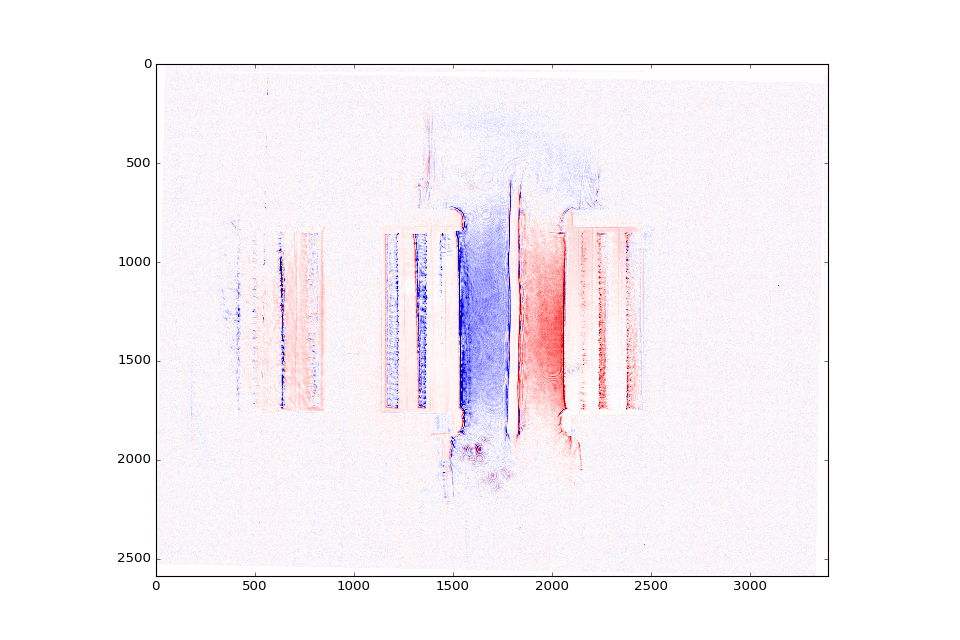

In [6]:
s.plot_data_px(clim=[-3,3])

In [8]:
s.scale=59.5
s.set_origin((1292,1798), extent=[-13,13,-10,10])

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


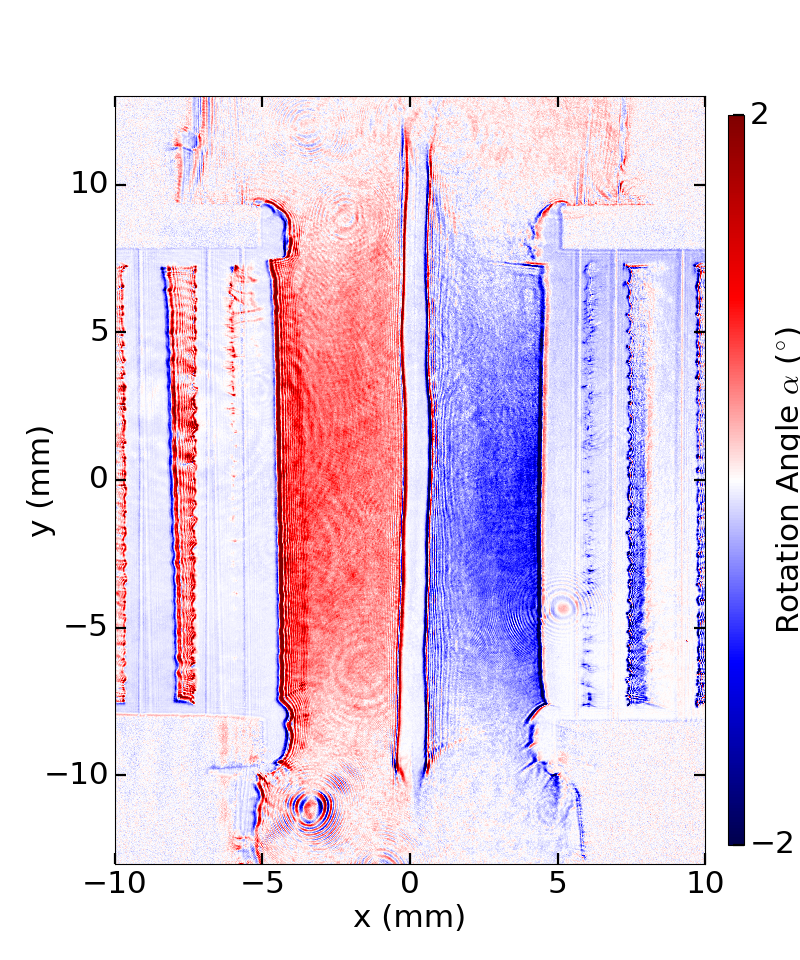

In [9]:
cm=2

fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-cm,cm])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,cm])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [22]:
fig.savefig(s.fn[:8]+' polarogram.png', dpi=600, bbox_inches='tight')

# Overlay Interferometry

In [9]:
I0fn="s0921_16 IR side on interferometry (2).JPG"
I1fn="s0921_16 IR side on interferometry (1).JPG"
IO=InterferogramOntoAlpha(s, I0fn, I1fn)

In [10]:
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
#t=pickle.load( open( "s0919_16 interferometry registration.p", "rb" ) )

In [11]:
IO.register(constraints=constraints)#, transform=t)

C:\Users\jdavies\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:549: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


<IPython.core.display.Javascript object>


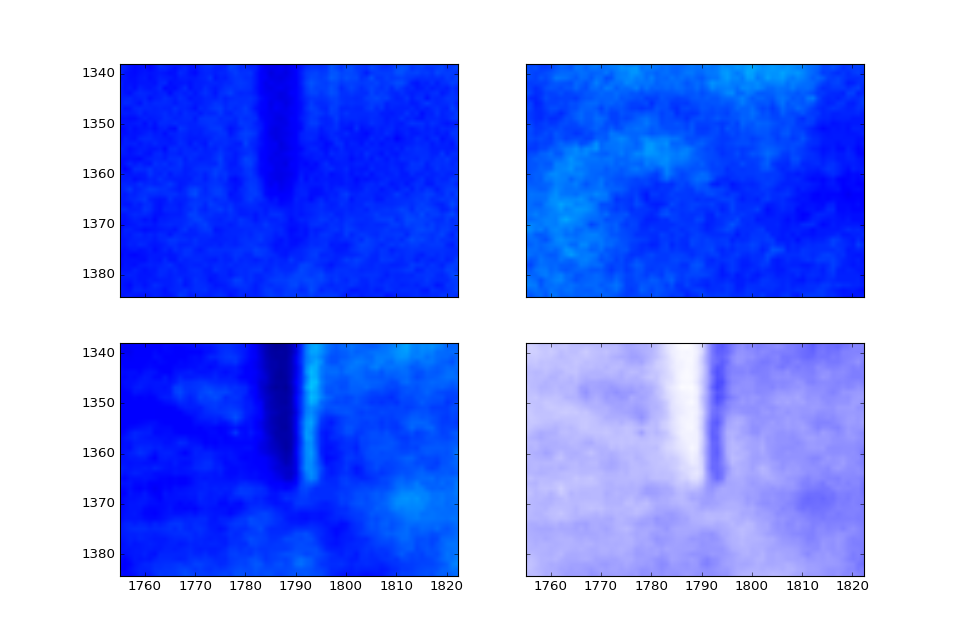

In [14]:
fig, ax=plt.subplots(2,2,sharex=True,sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(IO.I0zcn, clim=[0,0.5])
ax[1,0].imshow(IO.I0T, clim=[0,0.5])
ax[1,1].imshow(s.R0-IO.I0T, clim=[-0.2,0.2], cmap='bwr')

<IPython.core.display.Javascript object>


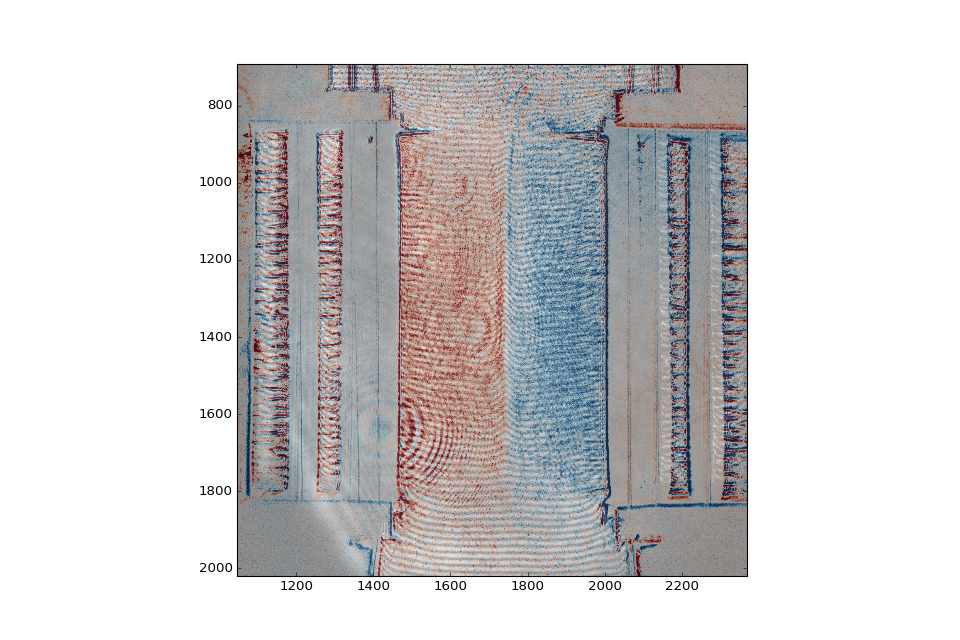

In [26]:
IO.plot_overlay_px(transparency=0.4, clim=[-0.5,0.5])

In [15]:
IO.scale=s.scale
IO.set_origin(s.origin, extent=[-13,13,-11,11])

<IPython.core.display.Javascript object>


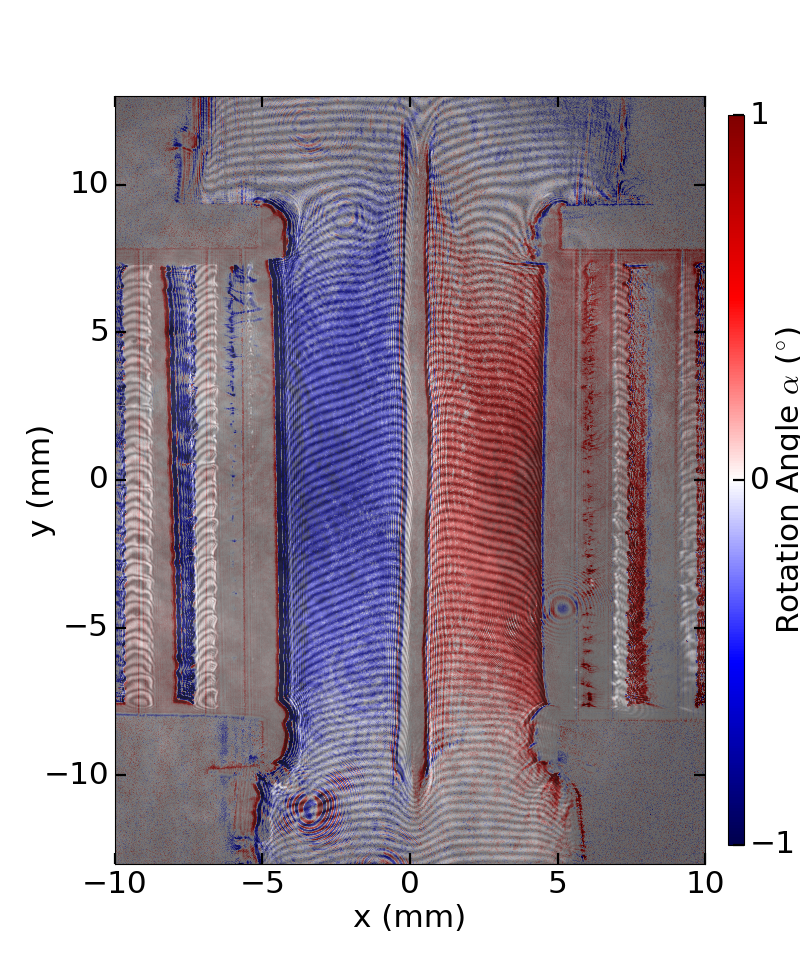

In [16]:
fig, ax=plt.subplots(figsize=(10,12))
far=s.plot_data_mm(ax=ax, clim=[-1,1])

ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-10,-5,0,5,10])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

ax.imshow(IO.data_c, cmap='gray', alpha=0.6, extent=s.extent)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-1,0,1])
cbar_ax.set_ylabel(r'Rotation Angle $\alpha$ ($^{\circ}$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)


In [17]:
fig.savefig(s.fn[:8]+' polarogram w interferometry.png', dpi=300, bbox_inches='tight')

(773, 416) (773, 773)


<IPython.core.display.Javascript object>


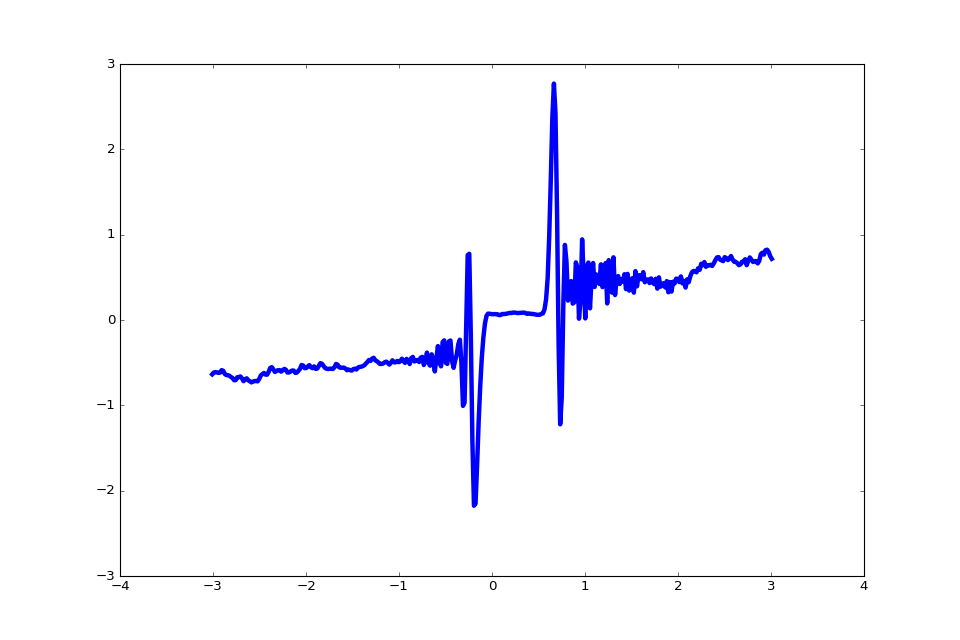

In [18]:
yy=0
s.create_lineout(start=(yy,-3), end=(yy,3), lineout_width=1*s.scale)
fig, ax=plt.subplots(figsize=(12,8))
s.plot_lineout(ax=ax, label='Data')


# Bring in The Density Map

In [10]:
I0fn="s0921_16 IR side on interferometry (2).JPG"
nefn="s0921_16 IR neL.txt"
b=FaradayMap2(s, I0fn, nefn)
constraints={'angle':(0,0.1),'scale':(0.7,0.1),'ty':(0,400),'tx':(40,200)}
t1=pickle.load( open( "s0921_16 interferometry registration.p", "rb" ) )

In [11]:
b.register(constraints=constraints, transform=t1)

C:\Users\jdhare\Anaconda3\lib\site-packages\scipy\ndimage\interpolation.py:568: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:222: RuntimeWarning: divide by zero encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:222: RuntimeWarning: overflow encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T
C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:222: RuntimeWarning: invalid value encountered in true_divide
  self.data=5.99e18*self.pm.data/self.I1T


<IPython.core.display.Javascript object>


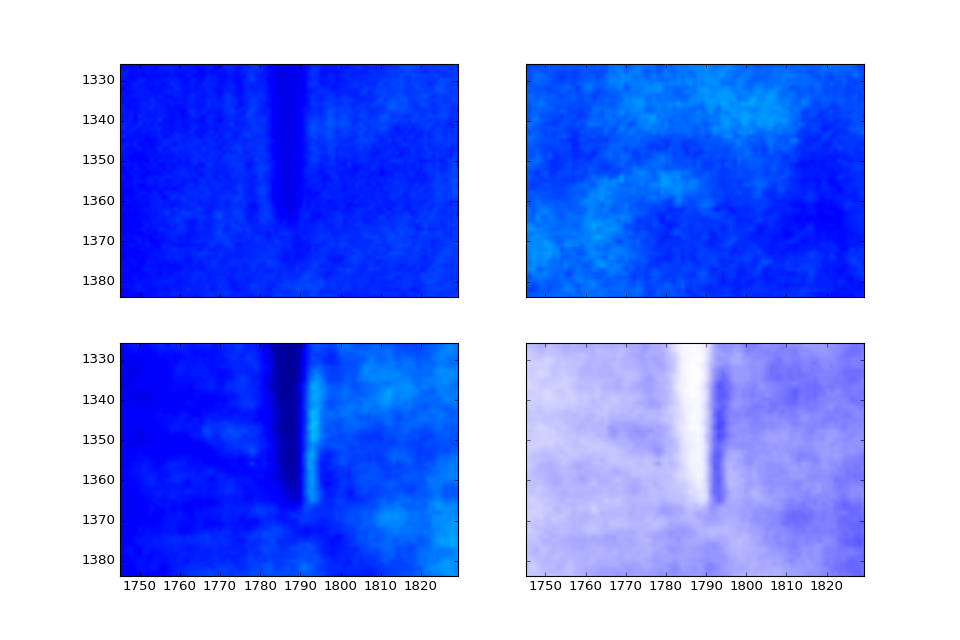

In [11]:
fig, ax=plt.subplots(2,2,sharex=True, sharey=True,figsize=(12,8))
ax[0,0].imshow(s.R0, clim=[0,0.1])
ax[0,1].imshow(b.I0zcn, clim=[0,0.5])
ax[1,0].imshow(b.I0T, clim=[0,0.5])
ax[1,1].imshow(s.R0-b.I0T, clim=[-0.2,0.2], cmap='bwr')

In [12]:
b.pickle_transform(fn=b.fn[:8]+' interferometry registration.p')

In [12]:
b.scale=s.scale
b.set_origin(s.origin, extent=[-13,13,-6,6])

C:\Users\jdhare\Documents\GitHub\magpie-analysis\magpie_data.py:36: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.data_c=self.data[ymin:ymax, xmin:xmax]


<IPython.core.display.Javascript object>


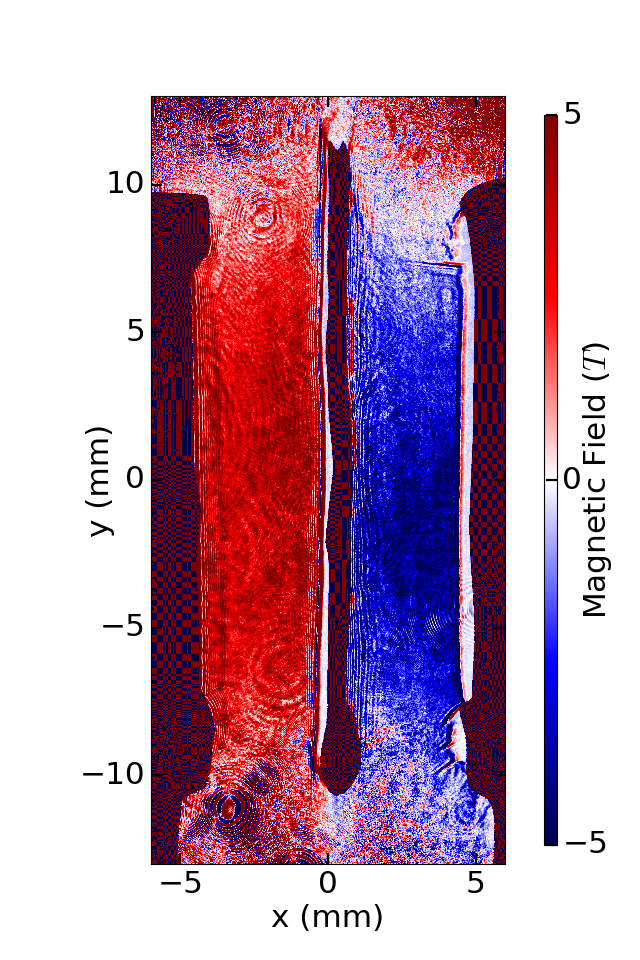

In [13]:
cm=5

fig, ax=plt.subplots(figsize=(8,12))
far=b.plot_data_mm(ax=ax, clim=[-cm,cm])
ax.set_xlabel('x (mm)',fontsize=28)
ax.set_ylabel('y (mm)',fontsize=28)

ax.set_xticks([-5,0,5])
ax.set_yticks([-10,-5,0,5,10])

ax.tick_params(labelsize=28, pad=5, length=10, width=2)
ax.get_yaxis().set_label_coords(-0.1,0.5)

cbar_ax = fig.add_axes([0.85, 0.12, 0.02, 0.76])#left,bottom,width,height
cbar_ax.tick_params(labelsize=28, pad=5, length=10, width=2)
fig.colorbar(far, cax=cbar_ax, ticks=[-cm,0,cm])
cbar_ax.set_ylabel(r'Magnetic Field ($T$)',fontsize=28)

cbar_ax.get_yaxis().set_label_coords(2.9,0.5)

In [31]:
fig.savefig('s0914_16 B field.png', dpi=300, bbox_inches='tight')

<IPython.core.display.Javascript object>


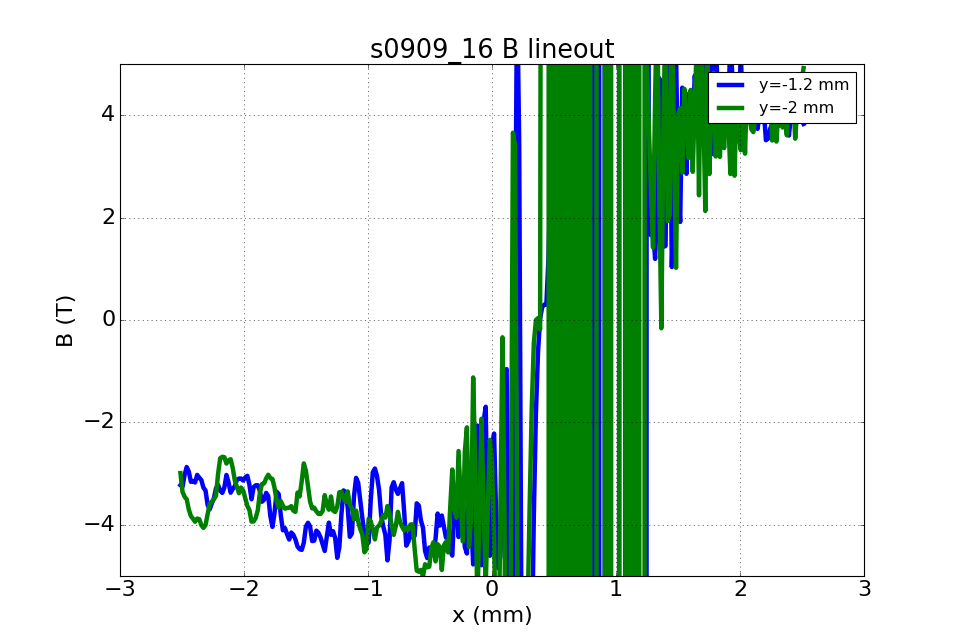

(844, 178) (844, 476)
(892, 178) (892, 476)


In [17]:
fig, ax=plt.subplots(figsize=(12,8))

yy=-1.2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-1.2 mm')

yy=-2
b.create_lineout(start=(yy,-3), end=(yy,2), lineout_width=0.5*s.scale)
b.plot_lineout(ax=ax, label='y=-2 mm')


ax.set_xlim([-3,3])
ax.set_xlabel('x (mm)', fontsize=20)
ax.set_ylim([-5,5])
ax.set_ylabel('B (T)', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title('s0909_16 B lineout', fontsize=23)

ax.grid(True)
ax.legend()

In [39]:
fig.savefig('s0914_16 B field lineouts.png', dpi=300, bbox_inches='tight')

In [33]:
print(res.fit_report())

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 73
    # data points      = 358
    # variables        = 4
    chi-square         = 24.304
    reduced chi-square = 0.069
[[Variables]]
    B0:   1.62427779 +/- 0.016439 (1.01%) (init= 4)
    x0:   0.12724265 +/- 0.012858 (10.11%) (init= 0)
    L:    0.40200258 +/- 0.022350 (5.56%) (init= 0.25)
    C:    0.18172526 +/- 0.015505 (8.53%) (init= 0)
[[Correlations]] (unreported correlations are <  0.100)
    C(x0, C)                     =  0.448 
    C(B0, L)                     =  0.423 



In [40]:
fig.savefig('s0909_16 B field lineout.png', dpi=300, bbox_inches='tight')

# Abel Inversion

In [19]:
#create an NelMap2 object but then replace the data with the image registered electron density.
s0914_16=NeLMap2('s0921_16 IR neL.txt', scale=97)

In [21]:
n=s0914_16
n.data=b.I1T
n.scale=b.scale
n.set_origin(b.origin, extent=[-13,13,-20,20])

<IPython.core.display.Javascript object>


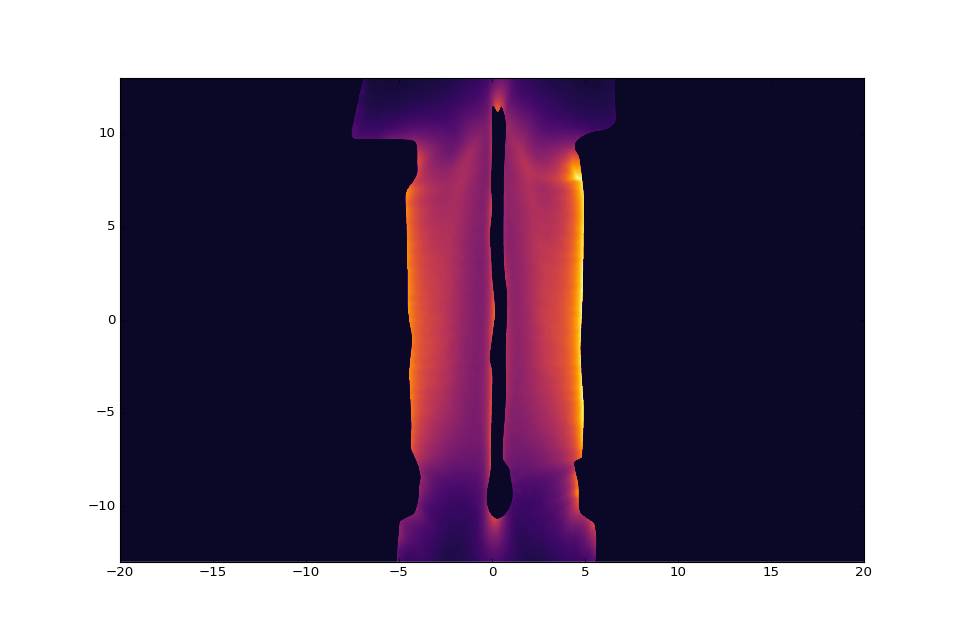

In [22]:
n.plot_data_mm()

(589, 148) (589, 1297)


<IPython.core.display.Javascript object>


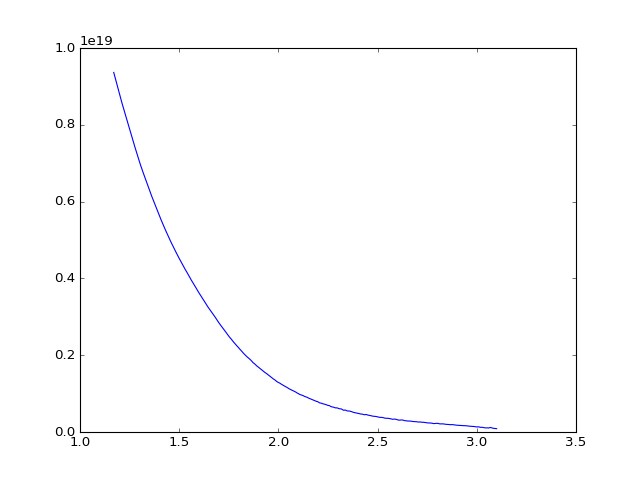

In [268]:
yy=3.1
x0=-17.5
x1=1.8
w=2
n.create_lineout(start=(yy,x0), end=(yy,x1), lineout_width=w*s.scale)

xc=13.5 #add 13.5 mm to shift origin
x=np.linspace(-x0+13.5,-x1+13.5, n.lo.size)*1e-1 #mm to cm
x=x[::-1]
neL=n.lo[::-1]
dx=x[1]-x[0]
neL_dx=np.gradient(neL, dx)

fig,ax=plt.subplots()
ax.plot(x, neL)

In [269]:
def f(r, dfdx, x):
    j=np.where(r<x)[0][0]
    d=dfdx[j:]
    xx=x[j:]
    i=d/(xx**2-r**2)**0.5
    return -1/np.pi*np.trapz(i,x=xx)

In [270]:
ne_r=np.array([f(rr, neL_dx, x) for rr in x[:-1]])

<IPython.core.display.Javascript object>


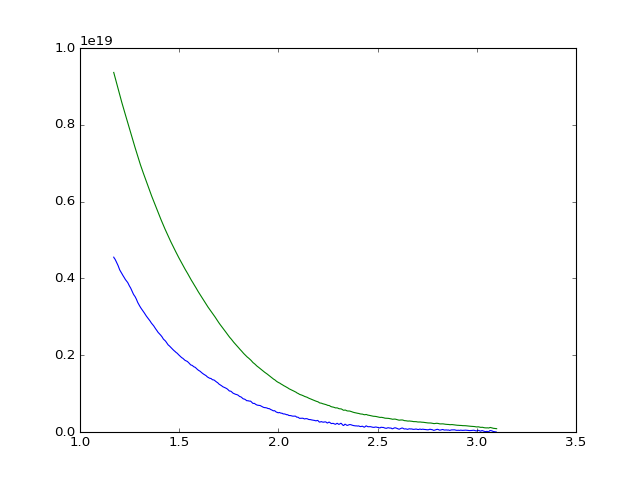

In [271]:
fig,ax=plt.subplots()
ax.plot(x[:-1], ne_r)
ax.plot(x, neL)

(589, 148) (589, 1297)


<IPython.core.display.Javascript object>


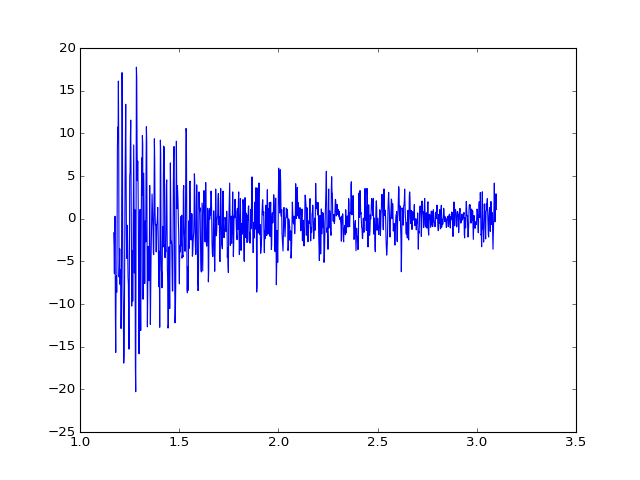

In [272]:
s.create_lineout(start=(yy,x0), end=(yy,x1), lineout_width=w*s.scale)

alpha=s.lo[::-1]
dx=x[1]-x[0]
alphax_dx=np.gradient(alpha/x, dx)

fig,ax=plt.subplots()
ax.plot(x, alphax_dx)

<IPython.core.display.Javascript object>


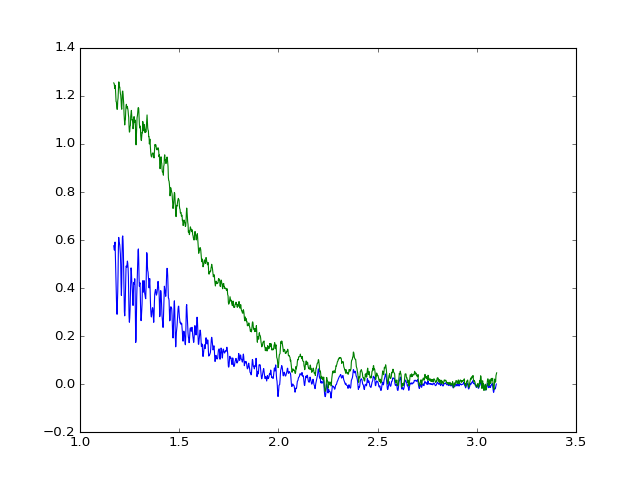

In [273]:
f_r=np.array([f(rr, alphax_dx, x) for rr in x[:-1]])

fig,ax=plt.subplots()
ax.plot(x[:-1], f_r)
ax.plot(x, alpha)

C:\Users\jdavies\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


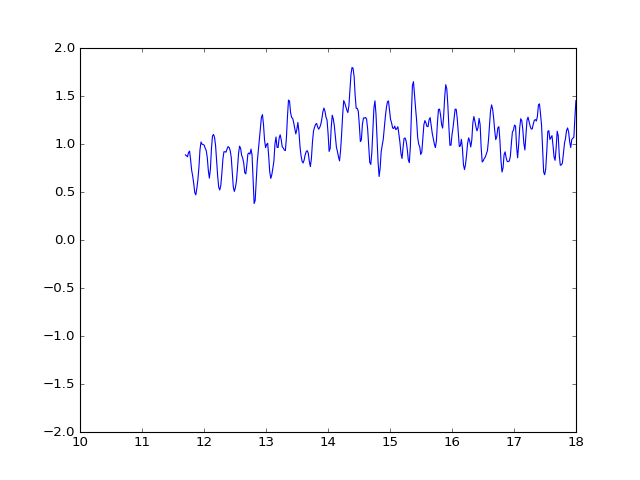

(10, 18)

In [276]:
B=5.99e18*f_r*x[:-1]/ne_r

fig,ax=plt.subplots()
ax.plot(x[:-1]*10, B)
ax.set_ylim([-2,2])
ax.set_xlim([10,18])

In [199]:
pickle.dump(b.transform, open('transform.p', 'wb'))

In [203]:
b.transform['scale']

0.69976159481574196